# Content-Based Recommender Systems With TF-IDF and Cosine Similarity

This project uses a content based filtering recommendation system to recommend activities based on the activity preferences of the users they choose when answering the questionnaire. From this question, the system will later recommend the same activity by calculating the similarities between activity categories and activity levels for each different activity. Before we start calculating similarity, we need to transform our data into a matrix consisting of feature vectors.

**1. Import Libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load data from tables
questioner_response = pd.read_csv('questioner_response.csv', sep=';')
detail_activity = pd.read_csv('detail_activity.csv', sep=';')
activity_rating = pd.read_csv('activity_rating.csv', sep=';')

In [4]:
questioner_response.head()

,user_id,activity_prefer,travel_preference,transportation_preference,activity_name,tour_name
0,1,Tracking,Group tour,Biking,Rice Field Trekking,Treasure Hunt & Cooking Battle
1,2,Tracking,Group tour,Walking,Jungle Trekking,Camping Into The Wild
2,3,Cycling,Solo,Motorcycling,Taro Village Cycling Tour,3D/2N Authentic Rural Experience at Tegal duku...
3,4,Cooking,Solo,Car,Cooking Experience,Hiking Journey In Taro Village
4,5,Cycling,Group tour,Biking,Kintamani Down Hill Cycling,3D/2N Authentic Rural Experience at Tegal duku...


In [5]:
detail_activity.head()

,activity_id,village_id,activity_location,activity_name,activity_category,activity_level,activity_desc
0,1,NaN,Taro,Rice Field Trekking,Trekking,Easy,Enjoy the glorious morning in the middle of va...
1,2,NaN,Taro,Jungle Trekking,Trekking,Easy,Feel the atmosphere being in the village by im...
2,3,NaN,Taro,Taro Village Cycling Tour,Cycling,Medium,Having fun and staying healthy can be done whi...
3,4,NaN,Kintamani,Kintamani Down Hill Cycling,Cycling,Intermediate,We are extending the fun before get you on the...
4,5,NaN,Taro,Cooking Experience,Cooking,Easy,Enjoy our rustic 3 course cooking experience r...


In [6]:
activity_rating.head()

,rating_id,user_id,activity_id,rating
0,1,1,1,5.0
1,2,2,2,5.0
2,3,2,4,5.0
3,4,3,3,4.0
4,5,1,6,3.0


In [7]:
average_ratings = activity_rating.groupby('activity_id')['rating'].mean().reset_index()
average_ratings.head()

,activity_id,rating
0,1,4.500000
1,2,4.375000
2,3,4.500000
3,4,4.700000
4,5,4.222222


**2. Preparation Data**

In [8]:
merged_data1 = pd.merge(detail_activity, average_ratings, on='activity_id', how='inner')
merged_data1.head()

,activity_id,village_id,activity_location,activity_name,activity_category,activity_level,activity_desc,rating
0,1,NaN,Taro,Rice Field Trekking,Trekking,Easy,Enjoy the glorious morning in the middle of va...,4.500000
1,2,NaN,Taro,Jungle Trekking,Trekking,Easy,Feel the atmosphere being in the village by im...,4.375000
2,3,NaN,Taro,Taro Village Cycling Tour,Cycling,Medium,Having fun and staying healthy can be done whi...,4.500000
3,4,NaN,Kintamani,Kintamani Down Hill Cycling,Cycling,Intermediate,We are extending the fun before get you on the...,4.700000
4,5,NaN,Taro,Cooking Experience,Cooking,Easy,Enjoy our rustic 3 course cooking experience r...,4.222222


**3. Analyzing Data**

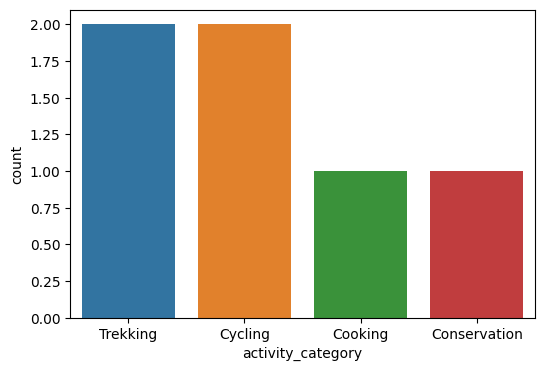

In [9]:
# Visualizing with the activity_category column
act_category=merged_data1['activity_category'].value_counts()

dims = (6, 4)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=merged_data1.activity_category)

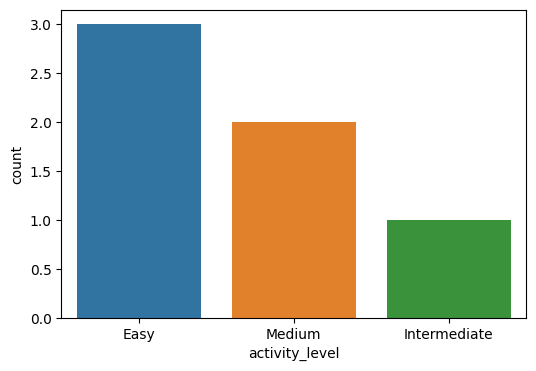

In [10]:
# Visualizing with the activity_level column
act_category=merged_data1['activity_level'].value_counts()

dims = (6, 4)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=merged_data1.activity_level)

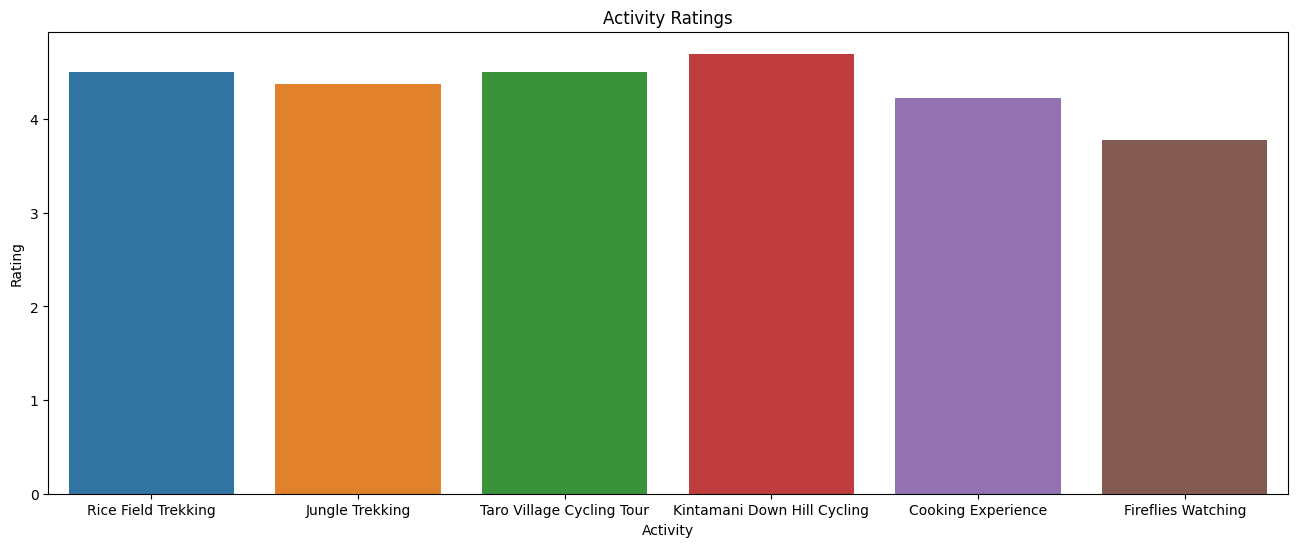

In [11]:
# Visualizing with the activity_name and rating column
data = merged_data1[['activity_name', 'rating']]

plt.figure(figsize=(16, 6))
sns.barplot(data=data, x='activity_name', y='rating')
plt.xlabel('Activity')
plt.ylabel('Rating')
plt.title('Activity Ratings')
plt.show()


**4. Preprocessing and Modeling**

**a. Based On activity Category and Activity Level**

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_data1['activity_name'] + ' ' + merged_data1['activity_category'] + ' ' + merged_data1['activity_level'])

In [13]:
cos_sim_matrix = cosine_similarity(tfidf_matrix)
cos_sim_matrix

array([[1.        , 0.6826571 , 0.        , 0.        , 0.09006146,
        0.        ],
       [0.6826571 , 1.        , 0.        , 0.        , 0.10028279,
        0.        ],
       [0.        , 0.        , 1.        , 0.44705151, 0.        ,
        0.13911234],
       [0.        , 0.        , 0.44705151, 1.        , 0.        ,
        0.        ],
       [0.09006146, 0.10028279, 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.13911234, 0.        , 0.        ,
        1.        ]])

In [14]:
cos_sim_matrix.shape

(6, 6)

In [15]:
merged_data1.head()

,activity_id,village_id,activity_location,activity_name,activity_category,activity_level,activity_desc,rating
0,1,NaN,Taro,Rice Field Trekking,Trekking,Easy,Enjoy the glorious morning in the middle of va...,4.500000
1,2,NaN,Taro,Jungle Trekking,Trekking,Easy,Feel the atmosphere being in the village by im...,4.375000
2,3,NaN,Taro,Taro Village Cycling Tour,Cycling,Medium,Having fun and staying healthy can be done whi...,4.500000
3,4,NaN,Kintamani,Kintamani Down Hill Cycling,Cycling,Intermediate,We are extending the fun before get you on the...,4.700000
4,5,NaN,Taro,Cooking Experience,Cooking,Easy,Enjoy our rustic 3 course cooking experience r...,4.222222


In [16]:
# Function untuk mendapatkan aktivitas serupa berdasarkan preferensi pengguna
def get_recommend_activities(activity_name, activity_category, activity_level, top_n=3):
    activity_indices = merged_data1[(merged_data1['activity_name'] == activity_name) & 
                                (merged_data1['activity_category'] == activity_category) & 
                                (merged_data1['activity_level'] == activity_level)].index
    if len(activity_indices) > 0:
        activity_index = activity_indices[0]
        similarity_scores = cos_sim_matrix[activity_index]
        similar_activities_indices = similarity_scores.argsort()[::-1][1:top_n+1]
        similar_activities = merged_data1.loc[similar_activities_indices, 'activity_name']
        
        # Menambahkan pilihan utama pengguna ke daftar aktivitas serupa
        similar_activities = [main_preference] + similar_activities.tolist()

        # Menghapus duplikat dari daftar similar_activities
        similar_activities = list(dict.fromkeys(similar_activities))

        return similar_activities
    else:
        print("Activity not found in dataset.")
        return []

# Prompt pengguna untuk memasukkan preferensi aktivitas
activity_name = input("Enter your activity preference: ")

# Mencari data activity_category dan activity_level yang sesuai dengan activity_name
activity_data = merged_data1[merged_data1['activity_name'] == activity_name].iloc[0]
activity_category = activity_data['activity_category']
activity_level = activity_data['activity_level']

main_preference = activity_name

similar_activities = get_recommend_activities(activity_name, activity_category, activity_level, top_n=3)

if similar_activities:
    print("Recommendation Activities:")
    for i, activity in enumerate(similar_activities):
        ratings = merged_data1[merged_data1['activity_name'] == activity]['rating']
        average_rating = ratings.mean()
        print(f"{i+1}. {activity}")
        print(f"   Average Rating: {average_rating:.2f}")


Enter your activity preference: Jungle Trekking
Recommendation Activities:
1. Jungle Trekking
   Average Rating: 4.38
2. Rice Field Trekking
   Average Rating: 4.50
3. Cooking Experience
   Average Rating: 4.22
4. Fireflies Watching
   Average Rating: 3.78


In [17]:
# Cek apakah pengguna baru atau telah mengisi kuesioner sebelumnya
is_new_user = False  # Ganti nilai ini dengan logika yang sesuai untuk menentukan apakah pengguna baru atau telah mengisi kuesioner sebelumnya

if is_new_user:
    # Prompt pengguna untuk memasukkan preferensi aktivitas saat pertama kali mendaftar atau login
    activity_name = input("Enter your activity preference: ")

    # Mencari data activity_category dan activity_level yang sesuai dengan activity_name
    activity_data = merged_data1[merged_data1['activity_name'] == activity_name].iloc[0]
    activity_category = activity_data['activity_category']
    activity_level = activity_data['activity_level']

    main_preference = activity_name

    similar_activities = get_recommend_activities(activity_name, activity_category, activity_level, top_n=3)

    if similar_activities:
        print("Recommendation Activities:")
        for i, activity in enumerate(similar_activities):
            ratings = merged_data1[merged_data1['activity_name'] == activity]['rating']
            average_rating = ratings.mean()
            print(f"{i+1}. {activity}")
            print(f"   Average Rating: {average_rating:.2f}")
else:
    # Mendapatkan rekomendasi aktivitas secara acak berdasarkan rating rata-rata tertinggi
    top_activities = merged_data1.groupby('activity_name')['rating'].mean().nlargest(6).index.tolist()

    if top_activities:
        print("Recommendation Activities:")
        for i, activity in enumerate(top_activities):
            ratings = merged_data1[merged_data1['activity_name'] == activity]['rating']
            average_rating = ratings.mean()
            print(f"{i+1}. {activity}")
            print(f"   Average Rating: {average_rating:.2f}")


Recommendation Activities:
1. Kintamani Down Hill Cycling
   Average Rating: 4.70
2. Rice Field Trekking
   Average Rating: 4.50
3. Taro Village Cycling Tour
   Average Rating: 4.50
4. Jungle Trekking
   Average Rating: 4.38
5. Cooking Experience
   Average Rating: 4.22
6. Fireflies Watching
   Average Rating: 3.78


In [18]:
# Fungsi untuk mendapatkan rekomendasi aktivitas berdasarkan preferensi pengguna
def get_recommend_activities(activity_name, activity_category, activity_level, top_n=3):
    activity_indices = merged_data1[(merged_data1['activity_name'] == activity_name) & 
                                (merged_data1['activity_category'] == activity_category) & 
                                (merged_data1['activity_level'] == activity_level)].index
    if len(activity_indices) > 0:
        activity_index = activity_indices[0]
        similarity_scores = cos_sim_matrix[activity_index]
        similar_activities_indices = similarity_scores.argsort()[::-1][1:top_n+1]
        similar_activities = merged_data1.loc[similar_activities_indices, 'activity_name']
        
        # Menambahkan pilihan utama pengguna ke daftar aktivitas serupa
        similar_activities = [activity_name] + similar_activities.tolist()

        # Menghapus duplikat dari daftar similar_activities
        similar_activities = list(dict.fromkeys(similar_activities))

        return similar_activities
    else:
        print("Activity not found in dataset.")
        return []

# Fungsi untuk mendapatkan rekomendasi aktivitas berdasarkan rating rata-rata tertinggi
def get_top_activities(top_n=6):
    top_activities = merged_data1.groupby('activity_name')['rating'].mean().nlargest(top_n).index.tolist()
    return top_activities

# Fungsi untuk menampilkan rekomendasi aktivitas ke pengguna
def show_recommendations(activities):
    if activities:
        print("Recommendation Activities:")
        for i, activity in enumerate(activities):
            ratings = merged_data1[merged_data1['activity_name'] == activity]['rating']
            average_rating = ratings.mean()
            print(f"{i+1}. {activity}")
            print(f"   Average Rating: {average_rating:.2f}")
    else:
        print("No activities to recommend.")

In [19]:
# Cek apakah pengguna baru atau telah mengisi kuesioner sebelumnya
is_new_user = True  # Ganti nilai ini dengan logika yang sesuai untuk menentukan apakah pengguna baru atau telah mengisi kuesioner sebelumnya

if is_new_user:
    # Prompt pengguna untuk memasukkan preferensi aktivitas saat pertama kali mendaftar atau login
    activity_name = input("Enter your activity preference: ")

    # Mencari data activity_category dan activity_level yang sesuai dengan activity_name
    activity_data = merged_data1[merged_data1['activity_name'] == activity_name].iloc[0]
    activity_category = activity_data['activity_category']
    activity_level = activity_data['activity_level']

    # Mendapatkan rekomendasi aktivitas berdasarkan preferensi pengguna
    similar_activities = get_recommend_activities(activity_name, activity_category, activity_level, top_n=3)

    # Menampilkan rekomendasi aktivitas ke pengguna
    if similar_activities:
        show_recommendations(similar_activities)
else:
    # Mendapatkan rekomendasi aktivitas berdasarkan rating rata-rata tertinggi
    top_activities = get_top_activities(top_n=6)

    # Menampilkan rekomendasi aktivitas ke pengguna
    if top_activities:
        show_recommendations(top_activities)

Enter your activity preference: Jungle Trekking
Recommendation Activities:
1. Jungle Trekking
   Average Rating: 4.38
2. Rice Field Trekking
   Average Rating: 4.50
3. Cooking Experience
   Average Rating: 4.22
4. Fireflies Watching
   Average Rating: 3.78


**Evaluation Model Based On Activity Level and Activity Category**

In [20]:
# Data ground truth yang relevan
ground_truth = ['Jungle Trekking', 'Rice Field Trekking', 'Cooking Experience', 'Fireflies Watching', 'Taro Village Cycling Tour', 'Kintamani Down Hill Cycling']

# Menghitung true positives
true_positives = len(set(similar_activities) & set(ground_truth))

# Menghitung false positives
false_positives = len(similar_activities) - true_positives

# Menghitung false negatives
false_negatives = len(ground_truth) - true_positives

# Menghitung recall
recall = true_positives / (true_positives + false_negatives)

# Menghitung precision
precision = true_positives / (true_positives + false_positives)

# Menghitung F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil
print("Evaluation Metrics")
print(f"Recall: {recall:.1%}")
print(f"Precision: {precision:.1%}")
print(f"F1-score: {f1_score:.1%}")


Evaluation Metrics
Recall: 66.7%
Precision: 100.0%
F1-score: 80.0%


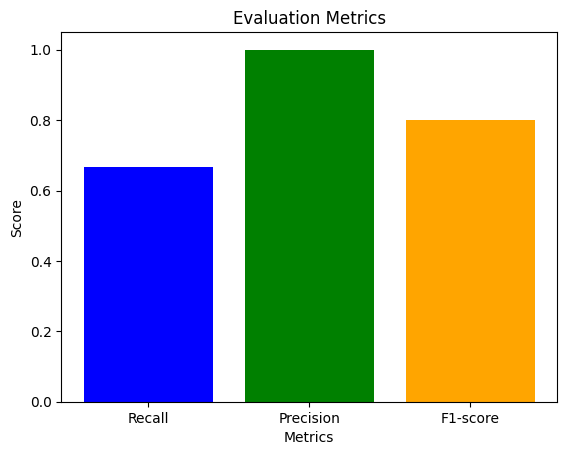

In [21]:
# Data for bar chart
metrics = ['Recall', 'Precision', 'F1-score']
scores = [recall, precision, f1_score]

# Color of each bar
colors = ['blue', 'green', 'orange']

# Create bar chart with colors
plt.bar(metrics, scores, color=colors)

# Set label and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')

# Show chart
plt.show()


These results indicate that from the ground truth data it has, the system manages to generate relevant recommendations with a fairly high degree of accuracy.


*   Recall measures the extent to which the system can identify and recommend activities that are truly relevant from ground_truth data. In this case, the system managed to cover 66.7% of the actually relevant activities.

*   Precision measures the extent to which the recommendations provided by the system are relevant. In this case, the system achieves a precision level of 100%, which means that all recommendations given are truly relevant activities.

*   F1-score is the harmonic average between recall and precision. In this case, the F1-score is 80.0%, indicating a good balance between recall and precision.

Overall, these results indicate that the system provides recommendations that are highly relevant to actual user preferences.

**b. Based On Activity Description**

In [22]:
merged_data1.head()

,activity_id,village_id,activity_location,activity_name,activity_category,activity_level,activity_desc,rating
0,1,NaN,Taro,Rice Field Trekking,Trekking,Easy,Enjoy the glorious morning in the middle of va...,4.500000
1,2,NaN,Taro,Jungle Trekking,Trekking,Easy,Feel the atmosphere being in the village by im...,4.375000
2,3,NaN,Taro,Taro Village Cycling Tour,Cycling,Medium,Having fun and staying healthy can be done whi...,4.500000
3,4,NaN,Kintamani,Kintamani Down Hill Cycling,Cycling,Intermediate,We are extending the fun before get you on the...,4.700000
4,5,NaN,Taro,Cooking Experience,Cooking,Easy,Enjoy our rustic 3 course cooking experience r...,4.222222


In [23]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_desc = tfidf.fit_transform(merged_data1['activity_name'] + ' ' + merged_data1['activity_desc'])

In [24]:
cos_sim_desc = cosine_similarity(tfidf_matrix_desc)
cos_sim_desc

array([[1.        , 0.027595  , 0.10252806, 0.04887533, 0.08404631,
        0.01664921],
       [0.027595  , 1.        , 0.08918228, 0.06817549, 0.03155217,
        0.01500601],
       [0.10252806, 0.08918228, 1.        , 0.14195101, 0.06948091,
        0.01375057],
       [0.04887533, 0.06817549, 0.14195101, 1.        , 0.05921334,
        0.        ],
       [0.08404631, 0.03155217, 0.06948091, 0.05921334, 1.        ,
        0.02403866],
       [0.01664921, 0.01500601, 0.01375057, 0.        , 0.02403866,
        1.        ]])

In [25]:
cos_sim_desc.shape

(6, 6)

In [26]:
# Function untuk mendapatkan aktivitas serupa berdasarkan preferensi pengguna
def get_recommend_activities_desc(activity_name, activity_desc, top_n=3):
    activity_indices_desc = merged_data1[(merged_data1['activity_name'] == activity_name) & 
                                (merged_data1['activity_desc'] == activity_desc)].index
    if len(activity_indices_desc) > 0:
        activity_index_desc = activity_indices_desc[0]
        similarity_scores_desc = cos_sim_desc[activity_index_desc]
        similar_activities_indices_desc = similarity_scores_desc.argsort()[::-1][1:top_n+1]
        similar_activities_desc = merged_data1.loc[similar_activities_indices_desc, 'activity_name']
        
        # Menambahkan pilihan utama pengguna ke daftar aktivitas serupa
        similar_activities_desc = [main_preference_desc] + similar_activities_desc.tolist()

        # Menghapus duplikat dari daftar similar_activities
        similar_activities_desc = list(dict.fromkeys(similar_activities_desc))

        return similar_activities_desc
    else:
        print("Activity not found in dataset.")
        return []

# Prompt pengguna untuk memasukkan preferensi aktivitas
activity_name = input("Enter your activity preference: ")

# Mencari data activity_category dan activity_level yang sesuai dengan activity_name
activity_data = merged_data1[merged_data1['activity_name'] == activity_name].iloc[0]
activity_desc = activity_data['activity_desc']

main_preference_desc = activity_name

similar_activities_desc = get_recommend_activities_desc(activity_name, activity_desc, top_n=3)

if similar_activities_desc:
    print("Recommendation Activities:")
    for i, activity in enumerate(similar_activities_desc):
        ratings = merged_data1[merged_data1['activity_name'] == activity]['rating']
        average_rating = ratings.mean()
        print(f"{i+1}. {activity}")
        print(f"   Average Rating: {average_rating:.2f}")


Enter your activity preference: Jungle Trekking
Recommendation Activities:
1. Jungle Trekking
   Average Rating: 4.38
2. Taro Village Cycling Tour
   Average Rating: 4.50
3. Kintamani Down Hill Cycling
   Average Rating: 4.70
4. Cooking Experience
   Average Rating: 4.22


**Evaluation Model Based On Activity Description**

In [27]:
# Data ground truth yang relevan
ground_truth = ['Jungle Trekking', 'Rice Field Trekking', 'Cooking Experience', 'Fireflies Watching', 'Taro Village Cycling Tour', 'Kintamani Down Hill Cycling']

# Menghitung true positives
true_positives = len(set(similar_activities_desc) & set(ground_truth))

# Menghitung false positives
false_positives = len(similar_activities_desc) - true_positives

# Menghitung false negatives
false_negatives = len(ground_truth) - true_positives

# Menghitung recall
recall = true_positives / (true_positives + false_negatives)

# Menghitung precision
precision = true_positives / (true_positives + false_positives)

# Menghitung F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil
print("Evaluation Metrics")
print(f"Recall: {recall:.1%}")
print(f"Precision: {precision:.1%}")
print(f"F1-score: {f1_score:.1%}")


Evaluation Metrics
Recall: 66.7%
Precision: 100.0%
F1-score: 80.0%


These results are the same as the evaluation model based on analysis using activity_category and activity_level.

It's just the different is the recommendation output provided by the system, according to the similarity of names and several other aspects the system provides activity recommendations that are different from before.

For example, is the Rice Field Trekking and Jungle Trekking activities, which can be seen from the name and category as well as several other aspects, these two activities should be related and have quite high similarity. However, when analyzed and processed using the description of each activity, the expected recommendations were not produced. When we try to input "Rice Field Trekking", the activity "Jungle Trekking" does not appear in the recommendations.

Based on our analysis, this can happen because the cosine_similarity value generated by activity_desc does not show a good level of similarity. Maybe there are some words in the description that are not very similar to the two activities so that the output can also be different.